## **Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

In [4]:
warnings.filterwarnings("ignore")

### **Load Data**

In [5]:
df = pd.read_csv("C:/Users/PC/Desktop/Car-Price-Proyect/data/data_preprocessing.csv")

### *Split Data*

In [7]:
from sklearn.model_selection import train_test_split

In [6]:
def load_inputs_outputs():
    
    X = df.drop(["price"],axis = "columns")
    y = df.price
    
    return X,y

In [30]:
X,y = load_inputs_outputs()

In [31]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [32]:
X_train.shape,X_test.shape

((43769, 119), (10943, 119))

### *Array Transform*

In [33]:
def array(data):
    return np.asarray(data)

In [34]:
X_train,Y_train = array(X_train),array(Y_train)

In [35]:
X_test,Y_test = array(X_test),array(Y_test)

## **Model**

In [36]:
from xgboost import XGBRegressor

In [39]:
params = {'learning_rate': 0.01,
 'max_depth': 8,
 'n_estimators': 500,
 'random_state': 42,
 'subsample': 0.85}

In [40]:
xgb = XGBRegressor(**params)

In [41]:
xgb.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [42]:
xgb.score(X_train,Y_train)

0.9655730714802955

In [43]:
xgb.score(X_test,Y_test)

0.9592566610292895

### *Metrics*

In [44]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score

In [45]:
class Metrics():

  def __init__(self,pred_train,pred_test):
    self.pred_train = pred_train
    self.pred_test = pred_test


  def MSE(self):

    mse_train = mean_squared_error(Y_train,self.pred_train)
    mse_test = mean_squared_error(Y_test,self.pred_test)

    return mse_train,mse_test


  def MAE(self):

    mse_train = mean_absolute_error(Y_train,self.pred_train)
    mse_test = mean_absolute_error(Y_test,self.pred_test)

    return mse_train,mse_test


  def CrossValidation(self,model,x,y):

    return cross_val_score(model,x,y,cv = 5,n_jobs = -1)

In [46]:
pred_train,pred_test = xgb.predict(X_train),xgb.predict(X_test)

In [47]:
metrics = Metrics(pred_train,pred_test)

In [48]:
mse_train,mse_test = metrics.MSE()
mae_train,mae_test = metrics.MAE()

#### *Mean Square Error*

It measures the average error between the original and the predicted value. This metric is very sensitive when the model offers very distant predictions. But at the same time it offers you a better approach to the performance of the model.

In [49]:
print(f"MSE Train {mse_train}")
print(f"MSE Test {mse_test}")

MSE Train 3108813.387428253
MSE Test 3734786.388006089


#### *Mean Aboslute Error*

It is similar to the MSE with the difference that it is very robust with outliers.

In [50]:
print(f"MAE Train {mae_train}")
print(f"MAE Test {mae_test}")

MAE Train 1231.5326398037942
MAE Test 1304.3153909792861


#### *Cross Validation*

It seeks to obtain the generalization average of the model.

In [51]:
cv = metrics.CrossValidation(xgb,X_test,Y_test)

In [53]:
cv

array([0.9262154 , 0.94889465, 0.94849989, 0.9469818 , 0.94337736])

In [52]:
cv.mean()

0.9427938184777069

## **Predictions**

In [54]:
df_predictions = pd.DataFrame({"True Values":Y_test,"Predicted Values":pred_test})

In [56]:
sns.set_style(style = "whitegrid")

In [63]:
def main():
    
    fig,ax = plt.subplots(1,1,figsize = (20,8))
    sns.scatterplot(data = df_predictions,x = "True Values",y = "Predicted Values",ax = ax,color = "c")
    sns.lineplot(Y_test,Y_test,ax = ax)

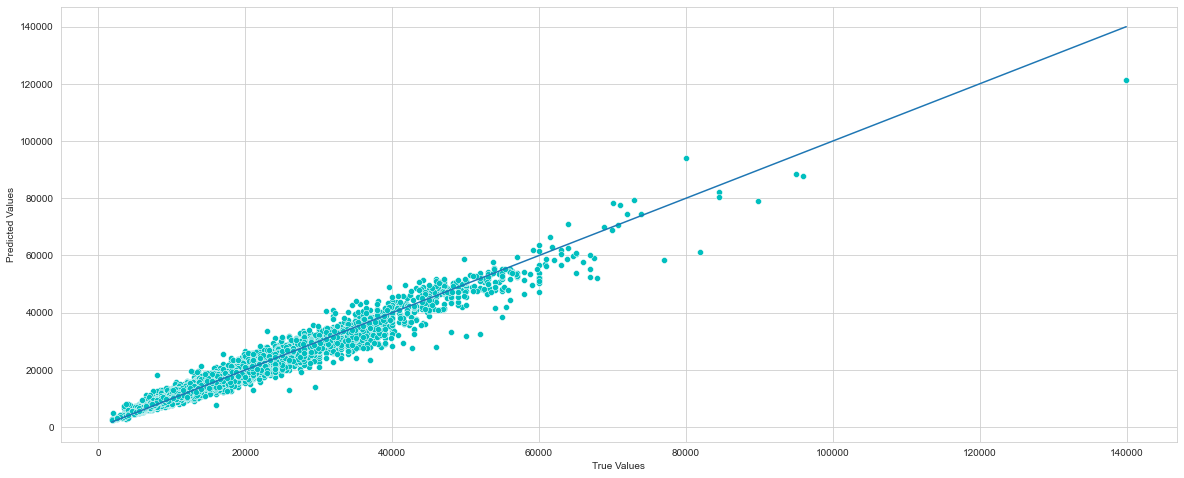

In [64]:
_ = main()

In [69]:
df_predictions.sample(n = 10,random_state = 2020)

,True Values,Predicted Values
2254,11000,9550.194336
10621,15981,15429.638672
2041,20498,21501.167969
857,14999,14472.739258
10409,8991,8962.675781
10293,7495,7123.083008
838,23490,23675.994141
6878,19750,18435.849609
7941,11695,12979.020508
914,15921,15148.715820


As can be seen in both the graph and the dataframe, the model offers predictions very close to the original value.

## *New Predictions*

In [70]:
columns = X.columns

In [73]:
def predict(manufacturer,model,trasmision,year,fuel_type,engineSize,mileage,tax,mpg):
    
    data = np.zeros(len(columns))
    
    manufacturer_idx = np.where(columns == manufacturer)[0][0]
    model_idx = np.where(columns == model)[0][0]
    trasmision_idx = np.where(columns == trasmision)[0][0]
    fuel_type_idx = np.where(columns == fuel_type)[0][0]
    
    data[111] = year
    data[115] = engineSize
    data[116] = mileage
    data[117] = tax
    data[118] = mpg
    
    
    
    if manufacturer_idx >=0:
        data[manufacturer_idx] = 1

    if model_idx >=0:
        data[model_idx] = 1
        
    if trasmision_idx >=0:
        data[trasmision_idx] = 1
        
    if fuel_type_idx >=0:
        data[fuel_type_idx] = 1
        
    data = np.asarray([data])
    
    return xgb.predict(data)

### *Ford Mustang*

<img src = 'https://cdn.carbuzz.com/gallery-images/840x560/617000/300/617330.jpg' height ="100"  width ="600">
    

In [74]:
predict('Ford','Mustang','Automatic',2020,'Petrol',5.0,6000,145,22)

array([40409.504], dtype=float32)

### *Toyota Corolla*

<img src = 'https://images.kavak.services/images/30662/toyota-corolla-base2019-frontal-lateral-piloto-lejana-1608341522498.jpg?d=540x310'>

In [75]:
predict('Toyota','Corolla','Manual',2019,'Hybrid',2.0,5000,140,86.23)

array([22305.098], dtype=float32)

### *Hyundi GT86*

<img src = "https://e00-marca.uecdn.es/assets/multimedia/imagenes/2016/03/19/14583947669790.jpg" height = "600" width = "600">

In [76]:
predict('Hyundi','GT86','Manual',2016,'Petrol',2.0,50000,265,36.2)

array([14897.175], dtype=float32)

### *Audi A6*

<img src = "https://mediaservice.audi.com/media/fast/H4sIAAAAAAAAAFvzloG1tIiBOTrayfuvpGh6-m1zJgaGigIGBgZGoDhTtNOaz-I_2DhCHkCFmZQZWMpTkwoYgSrcmLgycxPTU_VBArz____nZ-RONNNNrSjRzUvNzWcHKhHkOb-ibkWM-qErHf7vJx24fn7uNOll1Qw833LNLySudV57OLXeI96WVUX5mNALBp5asf1a0768mrXrSWyTTPmWHSqVoXMYeOL8QvzWXLq5deKi3KDn-or7fThPeTLw7NJfYSp3q16zSKLhr_Gk9ZNr02qfM_BYPI6SXx0rfDPKXvqsY5aZS9C1V9sYeET0pxzNU9UwClaX6Nvax7Y2-eE7GQYejfM9j15lMnm9qBQ3lZRyVYoO-rCGgWeqrjkPax1f7dLkpcz1j0Qt3yvrz2PgUdvxwXKO5oV6uROCZQxGeQvMVB65MvBcUY1ozPHlk7_6mPPlg1lsjmb9-9kZeOYxftz_577AdIUlkj2vlghLm7y-r8DAc8J9b-X3eV_sudhjzj8XN3gcaMMTy8Czt0LxN0uchcDNJycud_49KZt-3UKQgeevYxGToqOfZnNJ0JeOZqMnygeqkhl4mN691j9lxcaxZOWU_Akbemt2vg8E-m3vzKNXvq4ROqz4TjhxjUHTwaKDu38xsAKjh3EdkGB-ByR4XYAEx0EGMAmKOBOQdByIz_qRmYGB24GBgS2EAQT4hEuLcgoSixJz9YpSiwvy84ozy1IFNQyIBMKsPo6RrkEAm9tGnFYCAAA?mimetype=image/png" width = 600>

In [77]:
predict('Audi','A6','Semi-Auto',2018,'Petrol',2.0,30000,150,55.4)

array([21410.787], dtype=float32)

### *Mercedes Benz G Class* 

<img src = 'https://acnews.blob.core.windows.net/imggallery/800x600/GAZ_836767a50d324bec83096120554e734f.jpg' width = 600>

In [78]:
predict('Mercedes','G Class','Automatic',2016,'Petrol',4.0,20000,325,30.4)

array([58324.824], dtype=float32)

### *BMW X7*

<img src = "https://cdn.motor1.com/images/mgl/lA08g/s1/bmw-x7.jpg" width = 600>

In [79]:
predict('BMW','X7','Semi-Auto',2019,'Diesel',3.0,6000,150,32)

array([69818.94], dtype=float32)

### *Toyota Yaris*

<img src = 'https://www.elcarrocolombiano.com/wp-content/uploads/2018/06/20180608-TOYOTA-YARIS-2019-BRASIL-01.jpg' width = 600>

In [80]:
predict('Toyota','Yaris','Manual',2019,'Hybrid',1.5,15000,140,76.3)

array([12424.653], dtype=float32)

### *Ford Focus*

<img src = "https://noticias.coches.com/wp-content/uploads/2014/07/ford_focus-3door-2008_r6.jpg" width = 600>

In [81]:
predict('Ford','Focus','Manual',2008,'Petrol',1.6,50000,20,68)

array([5222.1655], dtype=float32)

### *Save Model*

We save it in JSON format in order to make the model run faster.In addition, we save the installation of more libraries in the file requirements.txt.

In [82]:
xgb.save_model("xgb_car_price.json")

### *Save JSON File*

We create a JSON file with the name of the input variables. In order to facilitate the preprocessing of new data data. Since the categorical variables such as the Transmission Model are in One Hot Encoding format.

In [83]:
import json

In [84]:
columns = {"data_column":[col for col in columns]}

In [23]:
with open("C:/Users/amado/Desktop/Vehicules/app/columns.json","w") as F:

    F.write(json.dumps(columns))